# ST445 Managing and Visualizing Data
## Graph Visualization
### Milan Vojnovic and Christine Yuen, MT 2017
---

## Programming languages @ GitHub

---

## 1. Generate a networkX graph

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx
try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either PyGraphviz or pydot")

In [8]:
try:
    fh = open('lang-pairs-per-repo-top-1000.csv', 'r')
except IOError:
    print("lang-pairs-per-repo-top-1000.csv not found")
    raise

thr = 20000
    
G = nx.Graph()

pfirst = 0

for line in fh.readlines():
    if pfirst == 1:
        (head, tail, weight) = line.split(',')
        G.add_node(head)
        G.add_node(tail)
        if int(weight)>thr:
            G.add_edge(head, tail)
    if pfirst == 0:
        pfirst = 1
        
remove = [node for node,degree in G.degree().items() if degree ==0]
G.remove_nodes_from(remove)

## 2. Node degrees

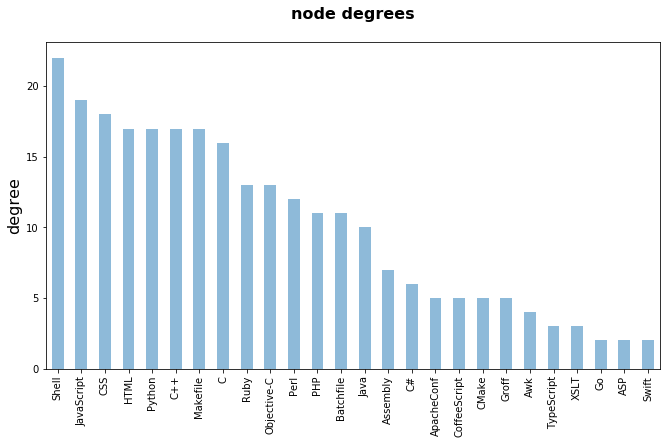

In [9]:
node_degrees = G.degree()
node_degree = sorted(node_degrees.values(), reverse=True)
node_name = sorted(node_degrees, key=node_degrees.get, reverse=True)

node_degree_df = pd.DataFrame(node_degree, index=node_name)

node_degree_df.plot(kind="bar", figsize=(11,6), legend=None, alpha=0.5)
plt.xticks(rotation=90)
plt.ylabel("degree", fontsize=16)
plt.title("node degrees\n", fontsize=16, fontweight='bold')
plt.show()

## 3. Betweenness centrality

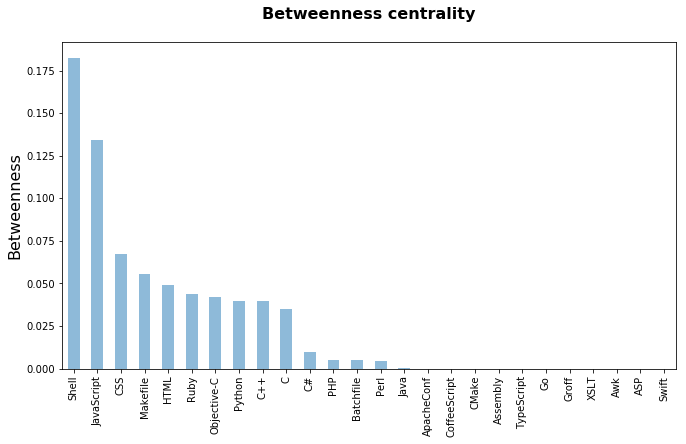

In [10]:
betweenness = nx.betweenness_centrality(G)
between = sorted(betweenness.values(), reverse=True)
node_name = sorted(betweenness, key=betweenness.get, reverse=True)

betweenness_df = pd.DataFrame(between, index=node_name)

betweenness_df.plot(kind="bar", figsize=(11,6), legend=None, alpha=0.5)

plt.xticks(rotation=90)
plt.ylabel("Betweenness", fontsize=16)
plt.title("Betweenness centrality\n", fontsize=16, fontweight='bold')
plt.show()

## 4. Shortest path

In [11]:
nodes = G.nodes()
shortest_path = pd.DataFrame(index=nodes, columns=nodes) # df fills with NAs

max_shortest_path_len = 0
max_shortest_path = None

for u in nodes:
    for v in nodes:
        if u!=v:
            path_len = len(nx.shortest_path(G, u, v, weight='length'))
            shortest_path.set_value(u, v, path_len)
            if path_len > max_shortest_path_len:
                max_shortest_path_len = path_len
                max_shortest_path = nx.shortest_path(G, u, v, weight='length')
            
# diameter of the graph
print('maximum shortest path is', max_shortest_path, 'with length', max_shortest_path_len)

maximum shortest path is ['ApacheConf', 'PHP', 'Ruby', 'Swift'] with length 4


## 5. Plot the graph using different layouts

### a. Spring layout

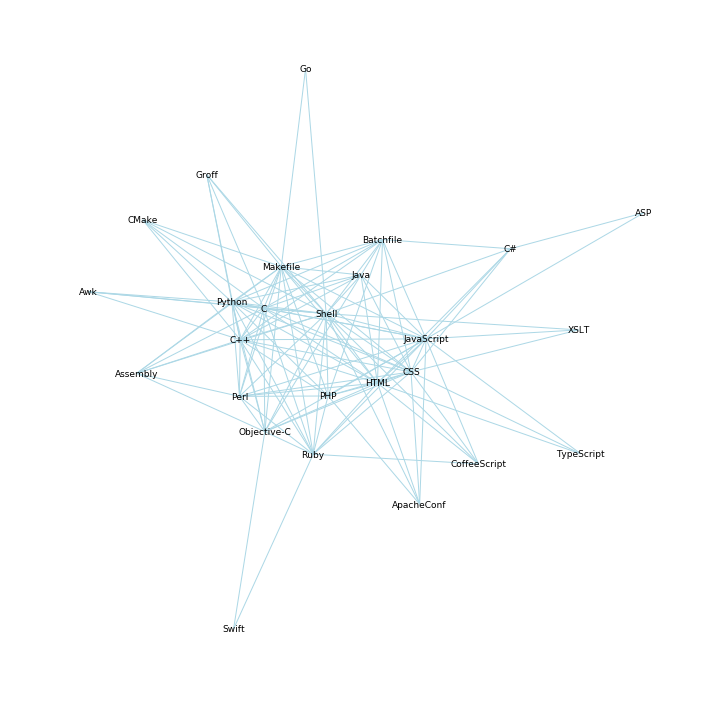

In [12]:
options = {
...     'node_color': 'lightblue',
...     'edge_color': 'lightblue',
...     'node_size': 1,
...     'width': 1,
...     'alpha': 1.0,
... }

plt.subplots(figsize=(10,10))

pos=nx.spring_layout(G)
nx.draw_networkx_labels(G,pos=pos,font_size=9,**options)
nx.draw_networkx_edges(G,pos=pos,**options)

plt.tight_layout()
plt.axis('off');

### b. fdp layout

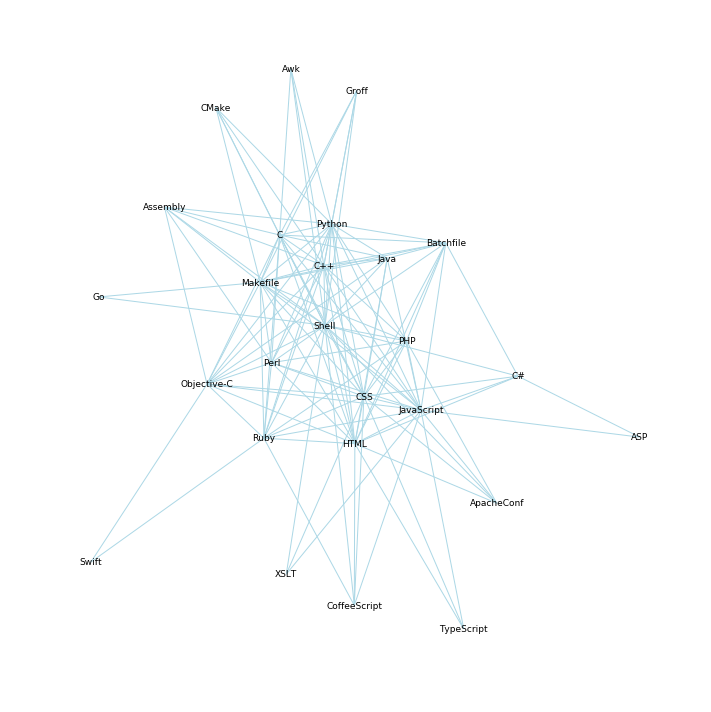

In [13]:
plt.subplots(figsize=(10,10))

pos = graphviz_layout(G, prog="fdp")
nx.draw_networkx_labels(G,pos=pos,font_size=9,**options)
nx.draw_networkx_edges(G,pos=pos,**options)

plt.tight_layout()
plt.axis('off');

### c. neato layout

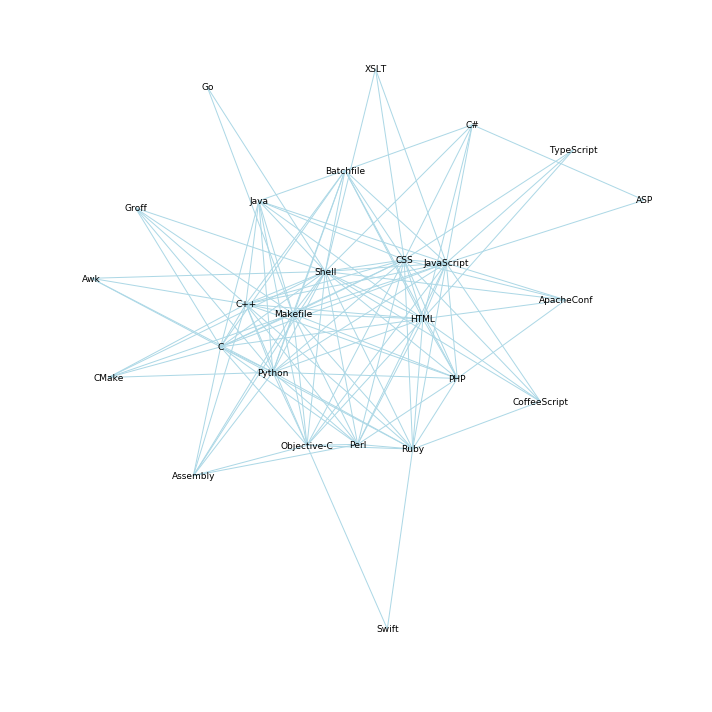

In [14]:
plt.subplots(figsize=(10,10))

pos = graphviz_layout(G, prog="neato")
labels=nx.draw_networkx_labels(G,pos=pos,font_size=9,**options)
nx.draw_networkx_edges(G,pos=pos,**options)

plt.tight_layout()
plt.axis('off');

### d. twopi layout

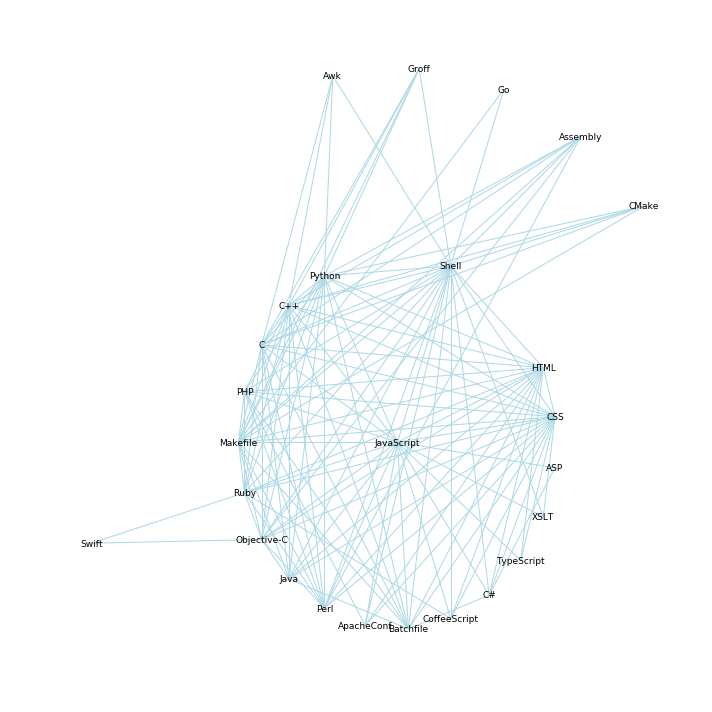

In [15]:
plt.subplots(figsize=(10,10))

pos = graphviz_layout(G, prog="twopi")
nx.draw_networkx_labels(G,pos=pos,font_size=9,**options)
nx.draw_networkx_edges(G,pos=pos,**options)

plt.tight_layout()
plt.axis('off');

### e. twopi with "Python" as the center node

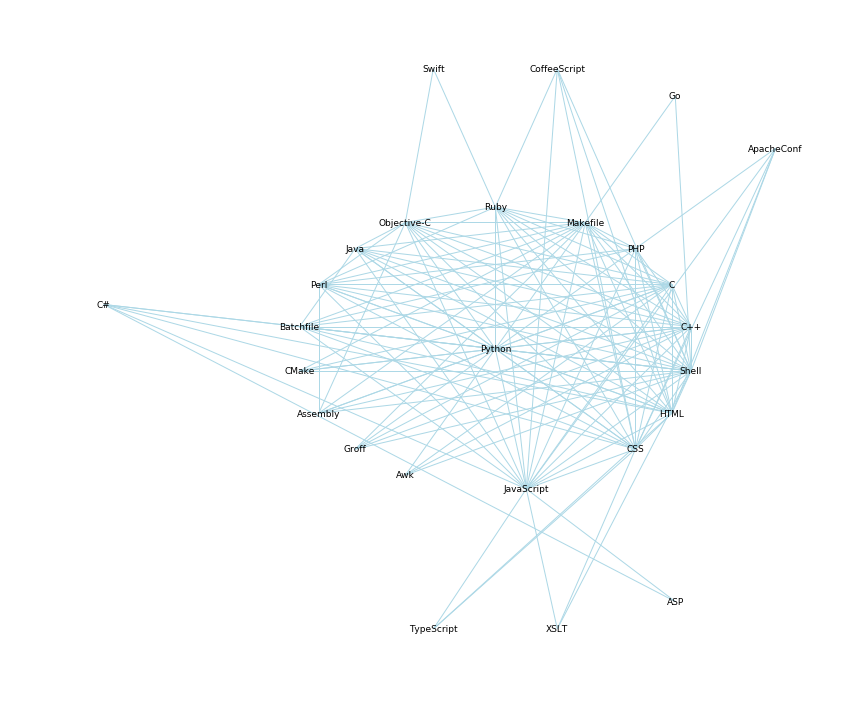

In [16]:
plt.subplots(figsize=(12,10))

pos = graphviz_layout(G, prog="twopi", root='Python')
nx.draw_networkx_labels(G,pos=pos,font_size=9,**options)
nx.draw_networkx_edges(G,pos=pos,**options)

plt.tight_layout()
plt.axis('off');

### f. circo

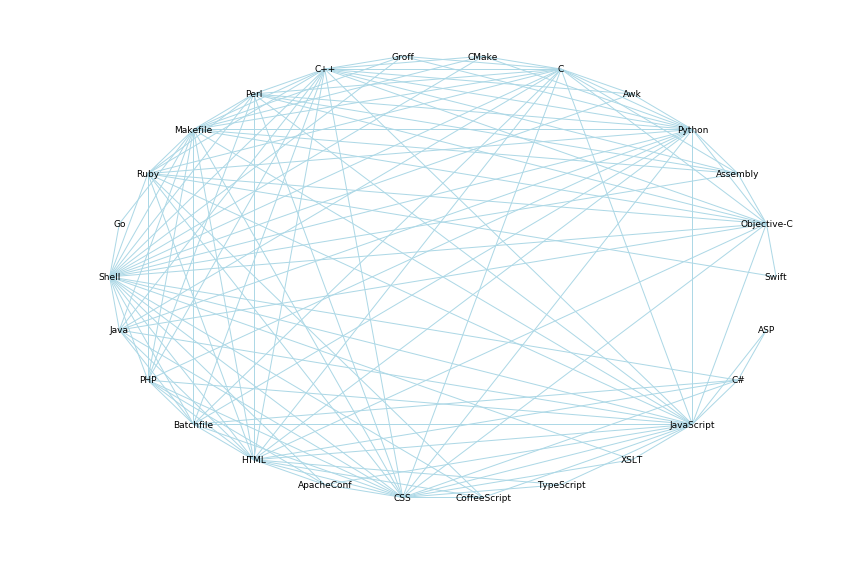

In [18]:
plt.subplots(figsize=(12,8))

pos = graphviz_layout(G, prog="circo")
nx.draw_networkx_labels(G,pos=pos,font_size=9,**options)
nx.draw_networkx_edges(G,pos=pos,**options)

plt.tight_layout()
plt.axis('off');

### g. dot

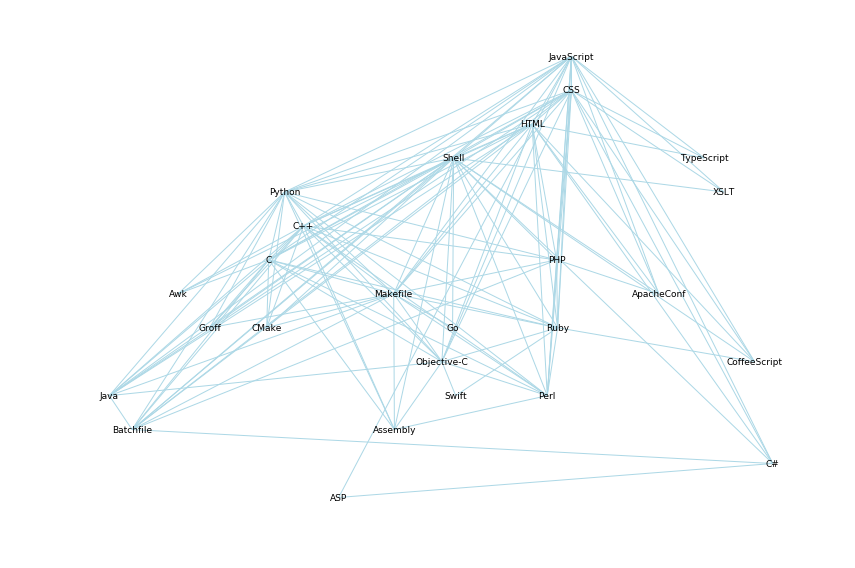

In [19]:
plt.subplots(figsize=(12,8))

pos = graphviz_layout(G, prog="dot")
nx.draw_networkx_labels(G,pos=pos,font_size=9,**options)
nx.draw_networkx_edges(G,pos=pos,**options)

plt.tight_layout()
plt.axis('off');